In [1]:
pip list

Package                            Version
---------------------------------- -------------------
-atplotlib                         3.2.2
-umpy                              1.18.5
absl-py                            0.9.0
aiohttp                            3.8.4
aiosignal                          1.3.1
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argcomplete                        1.12.0
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
astunparse                         1.6.3
async-timeout                      4.0.2
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache

# **Librerias**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

import pickle



from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

import joblib

PyAutoGUI                          0.9.53
pycodestyle                        2.6.0
pycosat                            0.6.3
pycparser                          2.20
pycryptodome                       3.14.1
pycurl                             7.43.0.5
pydocstyle                         5.0.2
pyflakes                           2.2.0
pygal                              2.4.0
PyGetWindow                        0.0.9
Pygments                           2.6.1
pylint                             2.5.3
PyMsgBox                           1.0.9
PyNaCl                             1.4.0
pyodbc                             4.0.0-unsupported
pyOpenSSL                          19.1.0
pyparsing                          2.4.7
pyPdf                              1.13
PyPDF2                             1.26.0
pyperclip                          1.8.2
pyproj                             3.5.0
pyreadline                         2.1
PyRect                             0.1.4
pyrsistent                         0.16.0


C:\Users\Lizbeth\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
%cd ..

C:\Users\Lizbeth\Dropbox\BootCamp MLops\Proyecto individual\Proyecto


# **EDA**

In [4]:
bike=pd.read_csv("data/bike_sharing.csv")

In [5]:
bike.tail(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [6]:
bike.shape

(17379, 17)

In [7]:
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Calidad de los datos

In [9]:
#Porcentaje de Nulos
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
weathersit    0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
workingday    0.0
dteday        0.0
weekday       0.0
holiday       0.0
hr            0.0
mnth          0.0
yr            0.0
season        0.0
cnt           0.0
dtype: float64

In [10]:
#Duplicados
bike_dup = bike.copy()
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(17379, 17)

**Pre-ingenieria**

In [11]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
bike['dteday']=pd.to_datetime(bike['dteday'],format="%Y-%m-%d")

Nueva variable número de semana del año

In [13]:
bike['week_number'] = bike['dteday'].dt.isocalendar().week


In [14]:
Varc=[ 'temp', 'atemp', 'hum', 'windspeed']
Vard=['season','mnth','weekday','weathersit','hr']
Varf=['dteday','week_number']
Varb=['yr','holiday','workingday']
Varo=['cnt']

Data frame sin la fecha

In [15]:
bike_new=bike[['season', 'yr', 'hr','mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

Dumies

In [16]:
#bike['cnt'].plot(kind='hist', bins=20, title='cnt')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
for variable in Vard:
    bike_new[variable] = bike_new[variable].astype('category')



<ipython-input-17-282f66aabc4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_new[variable] = bike_new[variable].astype('category')


In [18]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  int64   
 2   hr          17379 non-null  category
 3   mnth        17379 non-null  category
 4   holiday     17379 non-null  int64   
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  int64   
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  cnt         17379 non-null  int64   
dtypes: category(5), float64(4), int64(4)
memory usage: 1.1 MB


In [19]:
#Creación de dumies
bike_new = pd.get_dummies(bike_new, drop_first=True)


In [20]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            17379 non-null  int64  
 1   holiday       17379 non-null  int64  
 2   workingday    17379 non-null  int64  
 3   temp          17379 non-null  float64
 4   atemp         17379 non-null  float64
 5   hum           17379 non-null  float64
 6   windspeed     17379 non-null  float64
 7   cnt           17379 non-null  int64  
 8   season_2      17379 non-null  bool   
 9   season_3      17379 non-null  bool   
 10  season_4      17379 non-null  bool   
 11  hr_1          17379 non-null  bool   
 12  hr_2          17379 non-null  bool   
 13  hr_3          17379 non-null  bool   
 14  hr_4          17379 non-null  bool   
 15  hr_5          17379 non-null  bool   
 16  hr_6          17379 non-null  bool   
 17  hr_7          17379 non-null  bool   
 18  hr_8          17379 non-nu

In [21]:
bike_new.shape

(17379, 54)

Variables continuas

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

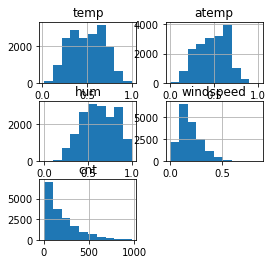

In [22]:
bike[Varc+Varo].hist(figsize=(4,4))

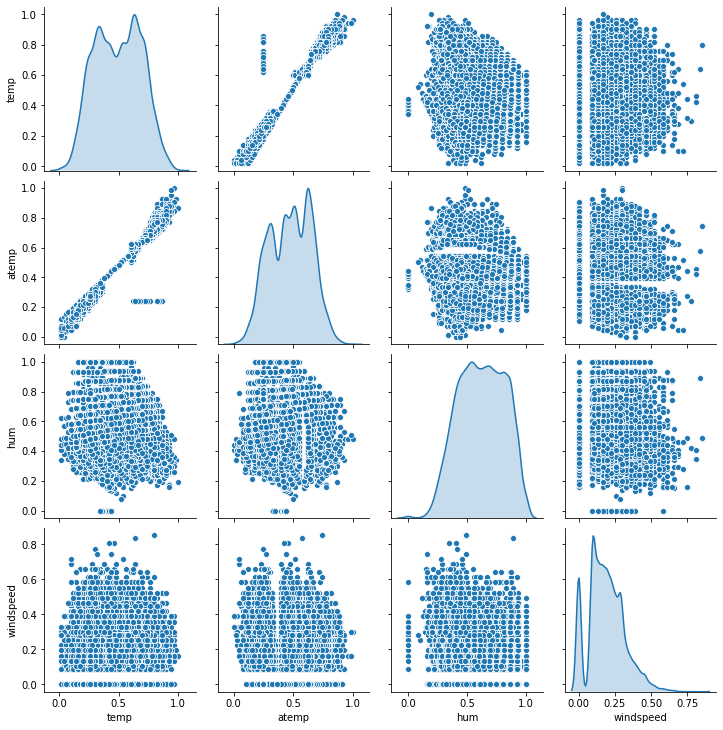

In [23]:
sns.pairplot(bike[Varc], diag_kind='kde')
plt.show()



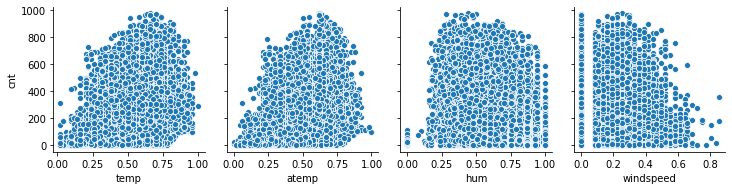

In [24]:
sns.pairplot(bike,x_vars=Varc, y_vars=Varo)
plt.show()

Variables discretas

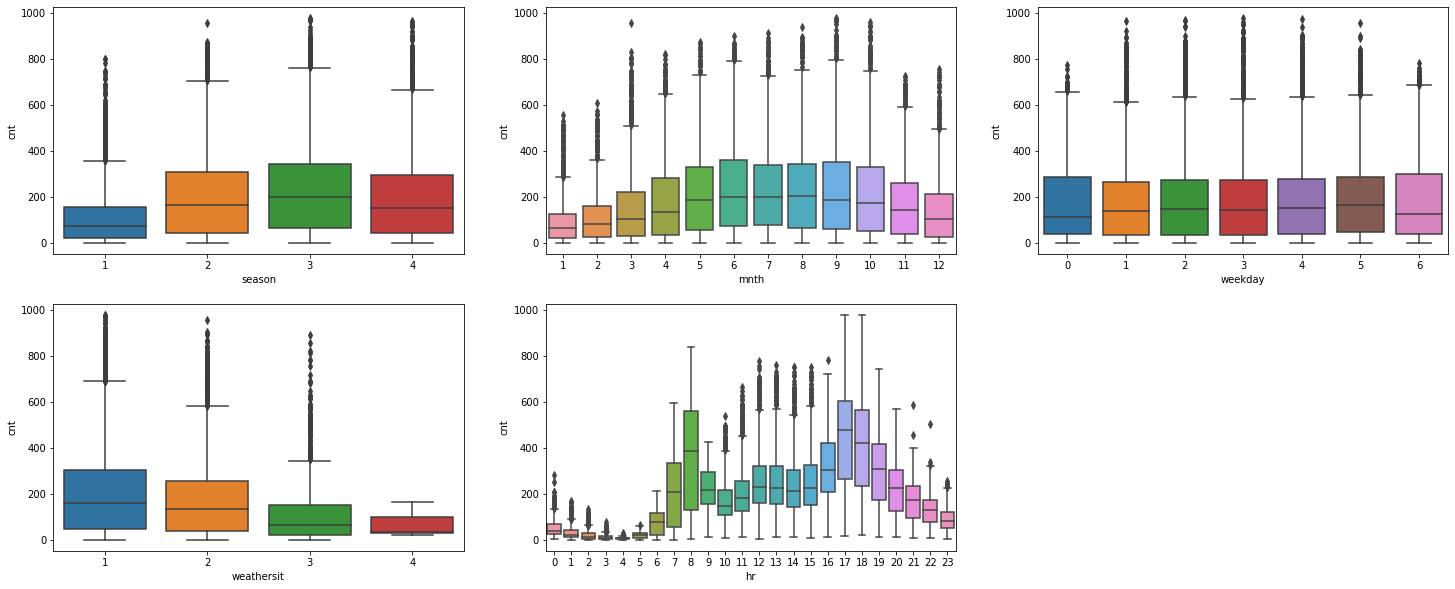

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
for i, col in enumerate(Vard):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = col, y = 'cnt', data = bike)
plt.show()


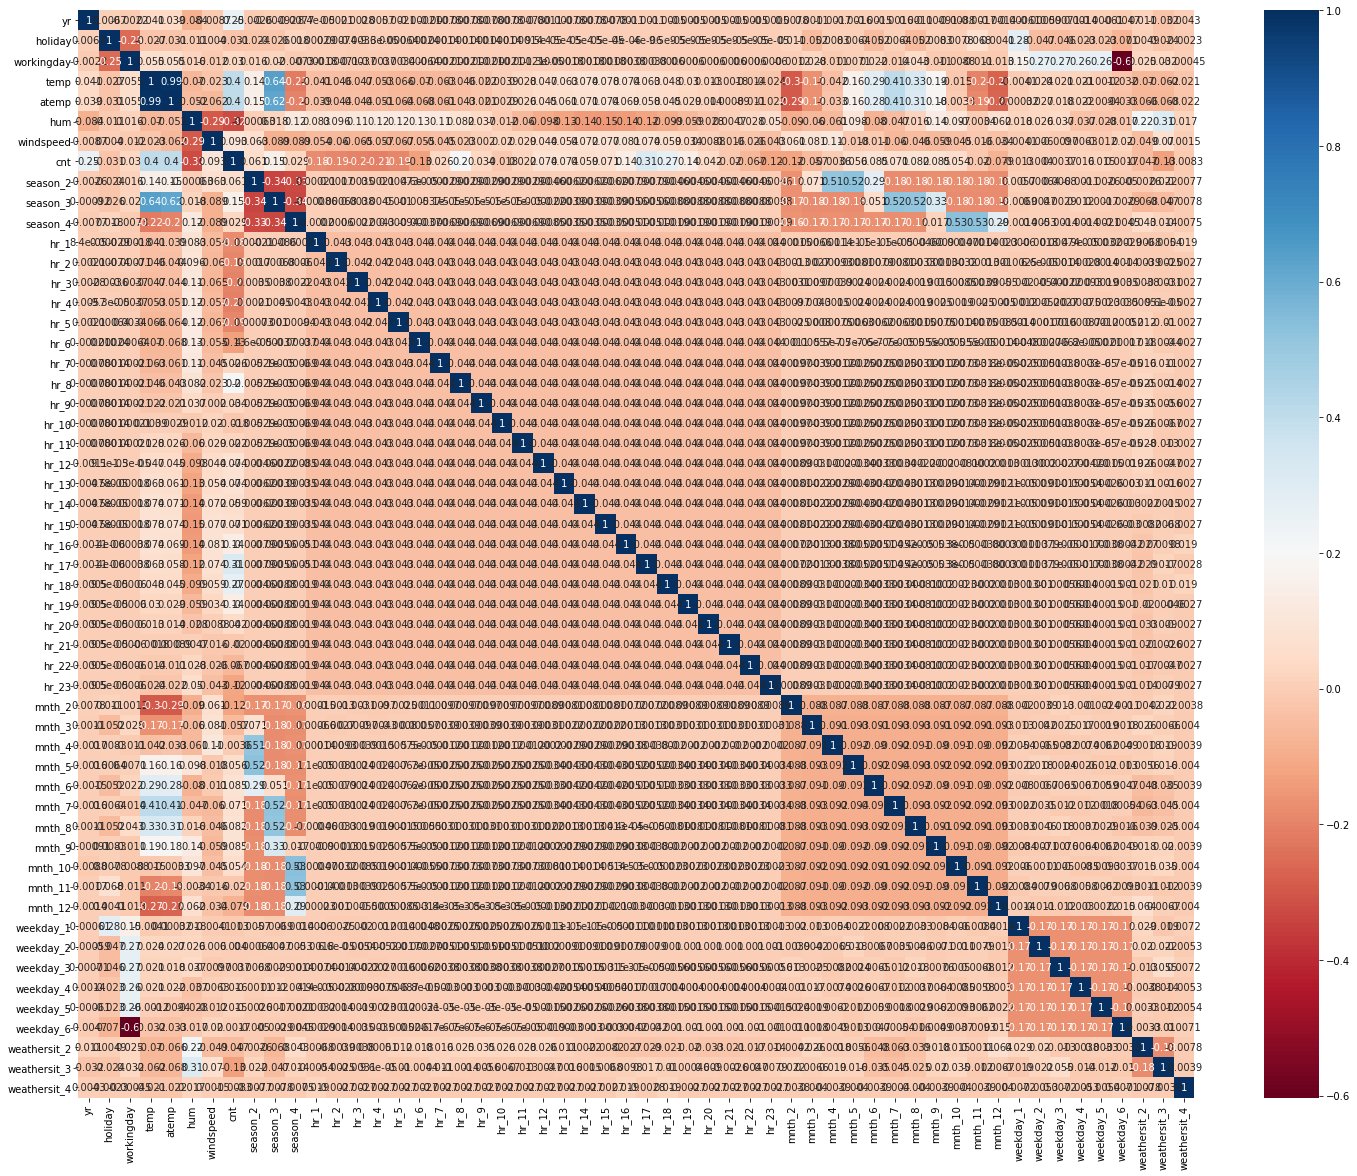

In [26]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

**Escalar las varibles continuas**

In [27]:
scaler = MinMaxScaler()

In [28]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0.24,0.2879,0.81,0.0,16,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0,0,0,0.22,0.2727,0.80,0.0,40,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,0,0,0.22,0.2727,0.80,0.0,32,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,0,0,0.24,0.2879,0.75,0.0,13,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,0,0.24,0.2879,0.75,0.0,1,False,False,...,False,False,False,False,False,False,True,False,False,False


In [29]:
bike_new[Varc+Varo] = scaler.fit_transform(bike_new[Varc+Varo])

In [30]:

bike_new.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0.224490,0.2879,0.81,0.0,0.015369,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0,0,0,0.204082,0.2727,0.80,0.0,0.039959,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,0,0,0.204082,0.2727,0.80,0.0,0.031762,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0,0,0,0.224490,0.2879,0.75,0.0,0.012295,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,0,0.224490,0.2879,0.75,0.0,0.000000,False,False,...,False,False,False,False,False,False,True,False,False,False


In [31]:
bike_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,0.028770,0.682721,0.486722,0.475775,0.627229,0.223460,0.193097
std,0.500008,0.167165,0.465431,0.196486,0.171850,0.192930,0.143811,0.185848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.326531,0.333300,0.480000,0.122840,0.039959
50%,1.000000,0.000000,1.000000,0.489796,0.484800,0.630000,0.228047,0.144467
75%,1.000000,0.000000,1.000000,0.653061,0.621200,0.780000,0.298225,0.286885
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Modelado**

### Data Split

In [32]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.80, test_size = 0.2, random_state = 42)

In [33]:
bike_test.shape

(3476, 54)

In [34]:
bike_train.shape

(13903, 54)

In [35]:
y_train = bike_train.pop('cnt')
X_train = bike_train

y_test = bike_test.pop('cnt')
X_test = bike_test

### Modelo

Seleccionaremos a las mejores 25 variables

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_4'],
      dtype='object')

In [38]:
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [39]:
# Modelo de regresion lineal
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

modelo= LinearRegression()
modelo.fit(X_train_rfe, y_train)


LinearRegression()

# Modelo final

In [40]:
X = bike.drop(columns=['instant', 'dteday',"casual", "registered" ,'cnt'])
y = bike['cnt']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
categorical_features = ['season', 'mnth', 'hr', 'weekday', 'weathersit']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features)
], remainder='passthrough')

In [43]:
lm = LinearRegression()
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', RFE(estimator=lm, n_features_to_select=25)),
    ('regression', lm)
])

In [44]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['season', 'mnth', 'hr',
                                                   'weekday',
                                                   'weathersit'])])),
                ('feature_selection',
                 RFE(estimator=LinearRegression(), n_features_to_select=25)),
                ('regression', LinearRegression())])

In [45]:
joblib_file = "models/bike_sharing_pipeline.pkl"
joblib.dump(pipeline, joblib_file)

['models/bike_sharing_pipeline.pkl']

In [46]:
y_pred = pipeline.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 10329.326884570286
R²: 0.6737977986511099


# Cargar el pipeline

In [48]:
joblib_file = "models/bike_sharing_pipeline.pkl"
loaded_pipeline = joblib.load(joblib_file)

# Usar el pipeline cargado para hacer predicciones
y_pred_loaded = loaded_pipeline.predict(X_test)

# Evaluar el modelo cargado
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)

print(f'Loaded MSE: {mse_loaded}')
print(f'Loaded R²: {r2_loaded}')

Loaded MSE: 10329.326884570286
Loaded R²: 0.6737977986511099


In [49]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [50]:
# Validar

#data = {'season': 1, 'yr': 1, 'hr': 10, 'mnth': 1, 'holiday': 0, 'weekday': 1,
       #'workingday': 1, 'weathersit': 1, 'temp': 0.344146, 'atemp': 0.363628,
       #'hum': 0.805825, 'windspeed': 0.160446}
